In [58]:
# Forecasted weather by a model for 2015-2100
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [37]:

# Read the merged data file as a DataFrame

# Read the final merged data file as a DataFrame
forecast_df = pd.read_csv(r"C:\Users\chimi\Desktop\Python Data Science Projects\Cocoa Production\Data -1\final_merged_data.csv")

# Display the DataFrame
print(forecast_df)



        Year       Region  AnnualForecastedDryDays Country_x  \
0       2015  Brong Ahafo                    36.80     Ghana   
1       2015  Brong Ahafo                    36.80     Ghana   
2       2015  Brong Ahafo                    36.80     Ghana   
3       2015  Brong Ahafo                    36.80     Ghana   
4       2015  Brong Ahafo                    36.80     Ghana   
...      ...          ...                      ...       ...   
111451  2100      Western                    34.23     Ghana   
111452  2100      Western                    34.23     Ghana   
111453  2100      Western                    34.23     Ghana   
111454  2100      Western                    34.23     Ghana   
111455  2100      Western                    34.23     Ghana   

        AnnualForecastedDrought(SPEI Index) Country_y  \
0                                       0.0     Ghana   
1                                       0.0     Ghana   
2                                       0.0     Ghana   
3  

In [38]:
forecast_df.columns

Index(['Year', 'Region', 'AnnualForecastedDryDays', 'Country_x',
       'AnnualForecastedDrought(SPEI Index)', 'Country_y',
       'Annualmaxdailytempforecast', 'Country_x.1', 'Annualmeantempforecast',
       'Country_y.1', 'Annualmindailytempforecast', 'Country',
       'AnnualWetDaysForecast', 'Month_x', 'MonthlyWetDaysForecast',
       'AnnualForecastedPrecip(mm)', 'AnnualRelativeHumidityForecast',
       'Month_y', 'MonthlyReleativeHumidityForecast'],
      dtype='object')

In [39]:
forecast_df.head(5)

,Year,Region,AnnualForecastedDryDays,Country_x,AnnualForecastedDrought(SPEI Index),Country_y,Annualmaxdailytempforecast,Country_x.1,Annualmeantempforecast,Country_y.1,Annualmindailytempforecast,Country,AnnualWetDaysForecast,Month_x,MonthlyWetDaysForecast,AnnualForecastedPrecip(mm),AnnualRelativeHumidityForecast,Month_y,MonthlyReleativeHumidityForecast
0,2015,Brong Ahafo,36.8,Ghana,0.0,Ghana,38.89,Ghana,27.35,Ghana,15.41,Ghana,117.61,Jan,1.13,1292.14,72.34,Jan,42.74
1,2015,Brong Ahafo,36.8,Ghana,0.0,Ghana,38.89,Ghana,27.35,Ghana,15.41,Ghana,117.61,Jan,1.13,1292.14,72.34,Feb,47.45
2,2015,Brong Ahafo,36.8,Ghana,0.0,Ghana,38.89,Ghana,27.35,Ghana,15.41,Ghana,117.61,Jan,1.13,1292.14,72.34,Mar,62.09
3,2015,Brong Ahafo,36.8,Ghana,0.0,Ghana,38.89,Ghana,27.35,Ghana,15.41,Ghana,117.61,Jan,1.13,1292.14,72.34,Apr,71.00
4,2015,Brong Ahafo,36.8,Ghana,0.0,Ghana,38.89,Ghana,27.35,Ghana,15.41,Ghana,117.61,Jan,1.13,1292.14,72.34,May,75.29


In [40]:
summary_df = forecast_df.groupby('Region').describe().reset_index()

In [41]:
print(summary_df)

          Region     Year                                                     \
                    count    mean        std     min     25%     50%     75%   
0    Brong Ahafo  12384.0  2057.5  24.825386  2015.0  2036.0  2057.5  2079.0   
1        Central  12384.0  2057.5  24.825386  2015.0  2036.0  2057.5  2079.0   
2        Eastern  12384.0  2057.5  24.825386  2015.0  2036.0  2057.5  2079.0   
3  Greater Accra  12384.0  2057.5  24.825386  2015.0  2036.0  2057.5  2079.0   
4       Northern  12384.0  2057.5  24.825386  2015.0  2036.0  2057.5  2079.0   
5     Upper East  12384.0  2057.5  24.825386  2015.0  2036.0  2057.5  2079.0   
6     Upper West  12384.0  2057.5  24.825386  2015.0  2036.0  2057.5  2079.0   
7          Volta  12384.0  2057.5  24.825386  2015.0  2036.0  2057.5  2079.0   
8        Western  12384.0  2057.5  24.825386  2015.0  2036.0  2057.5  2079.0   

          AnnualForecastedDryDays  ... AnnualRelativeHumidityForecast         \
      max                   count  ... 

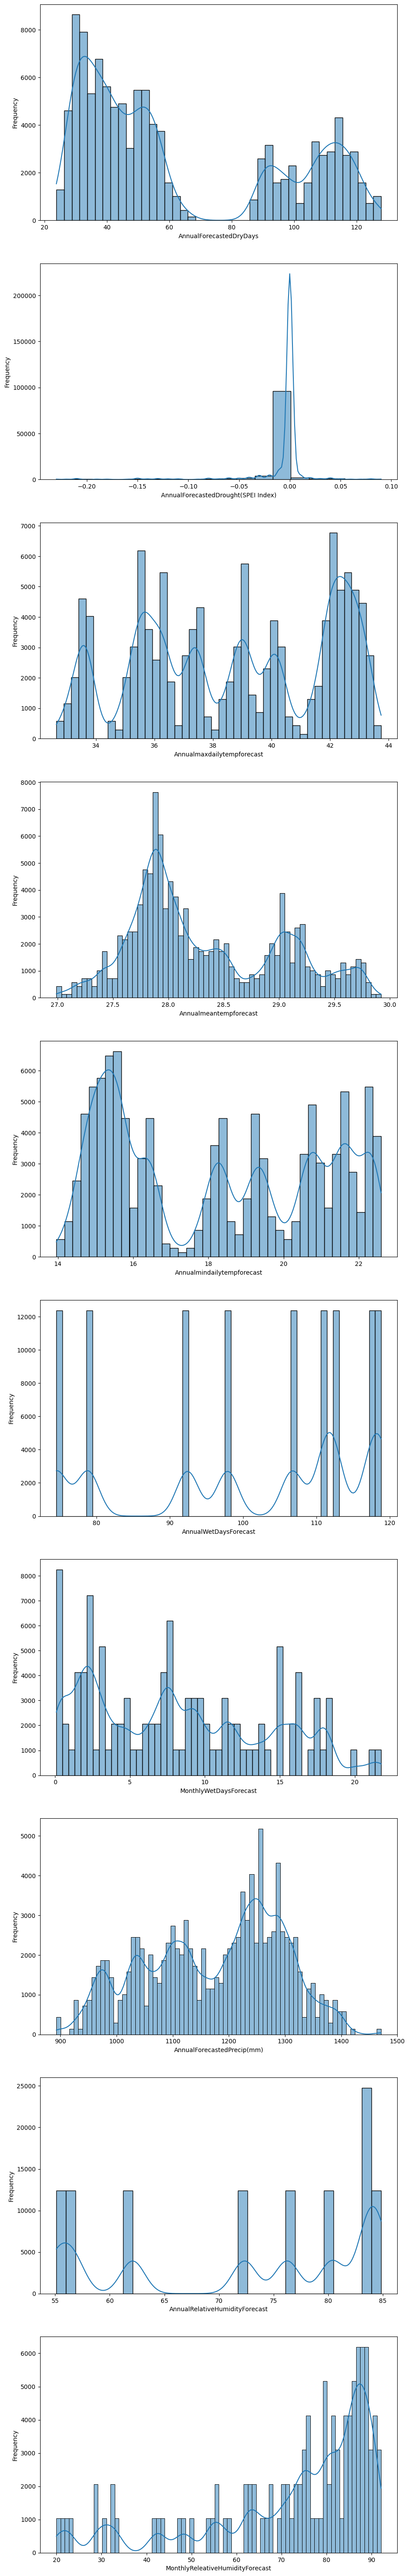

In [68]:
# Distribution of all numerical data
# Select the numerical columns excluding the "Year" column
numeric_columns = forecast_df.select_dtypes(include='number').columns.drop('Year')

# Create subplots for each numerical variable
fig, axs = plt.subplots(len(numeric_columns), figsize=(10, 6 * len(numeric_columns)))
fig.tight_layout(pad=5.0)

# Iterate through each numerical column and plot histogram using sns.histplot
for i, column in enumerate(numeric_columns):
    ax = axs[i]
    sns.histplot(data=forecast_df, x=column, kde=True, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.show()


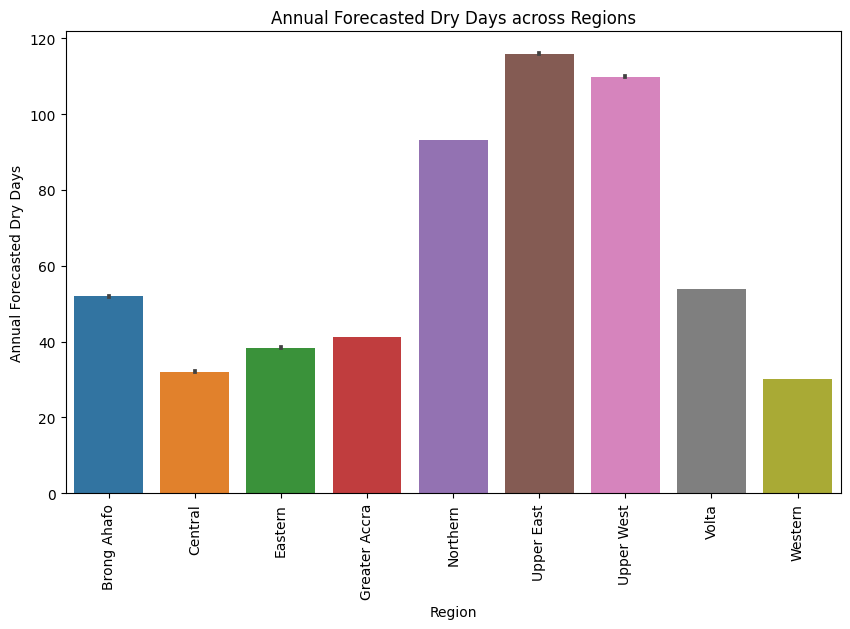

In [24]:
# How does the annual forecasted dry days varies across regions?
# Norther, Upper East, and Upper West Ghana are forecasted to have the most dry days.

plt.figure(figsize=(10, 6))
sns.barplot(data=forecast_df, x='Region', y='AnnualForecastedDryDays')
plt.xlabel('Region')
plt.ylabel('Annual Forecasted Dry Days')
plt.title('Annual Forecasted Dry Days across Regions')
plt.xticks(rotation=90)
plt.show()


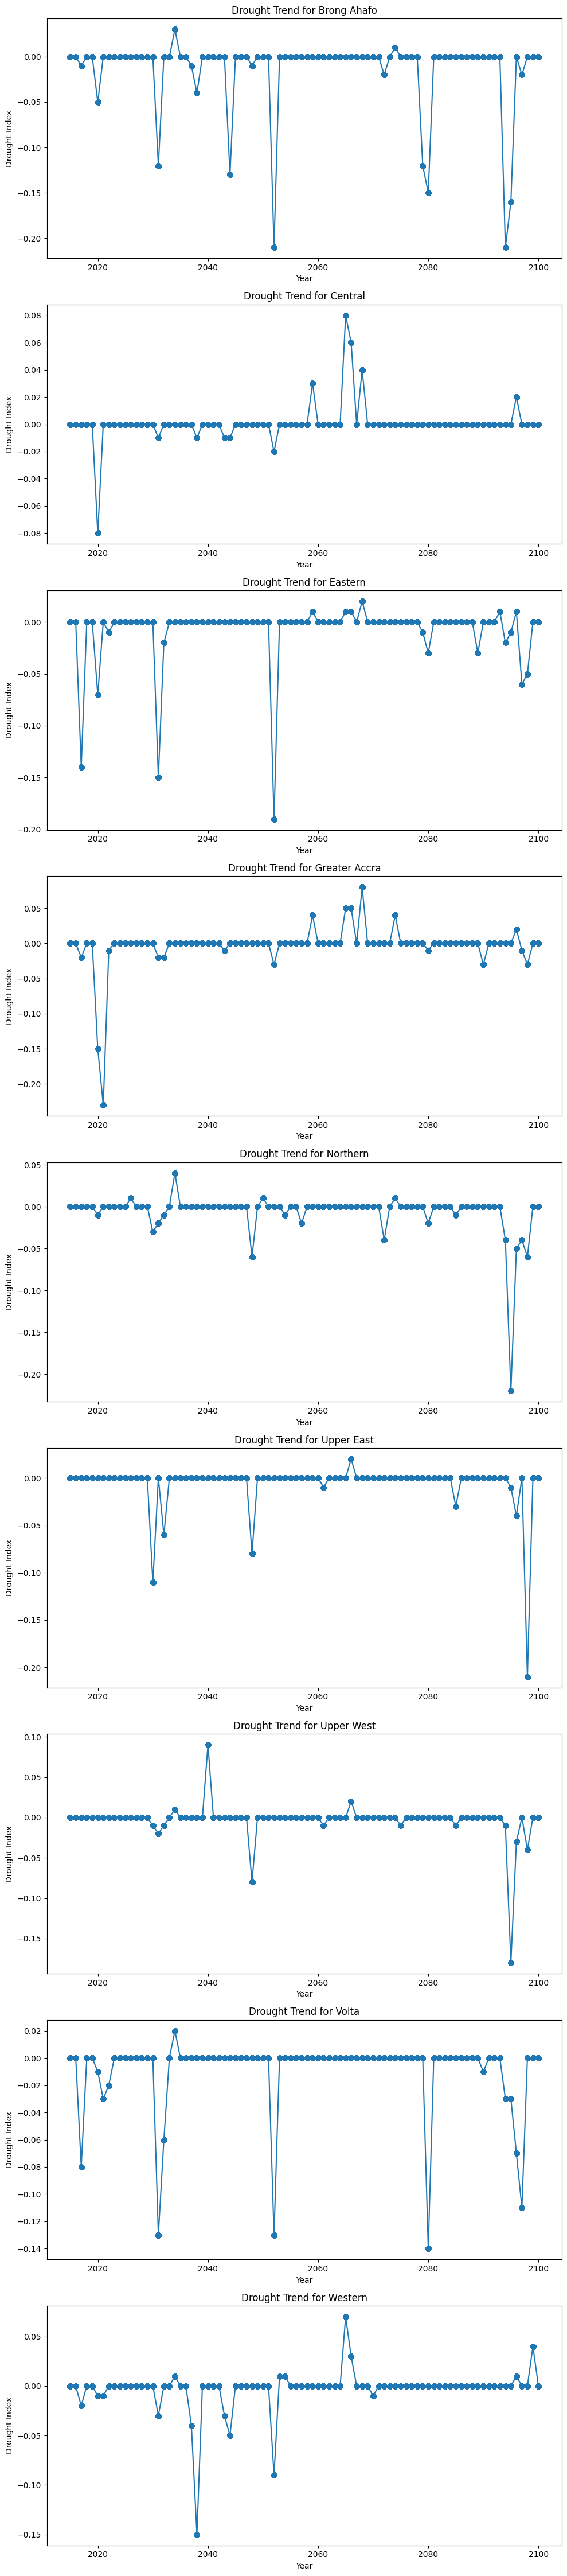

In [54]:
#How does the drought index vary over time within each region?
# Drought trend remains consistent with niether increase or decrease.It remains consistent.

# Select the relevant columns for drought analysis
drought_data = forecast_df[['Year', 'Region', 'AnnualForecastedDrought(SPEI Index)', 'AnnualForecastedDryDays']]

# Get the unique regions in the dataset
regions = drought_data['Region'].unique()

# Set the figure size and number of subplots
fig, axs = plt.subplots(len(regions), 1, figsize=(10, 5 * len(regions)))

# Loop through each region
for i, region in enumerate(regions):
    # Filter the data for the current region
    region_data = drought_data[drought_data['Region'] == region]
    
    # Plot the drought index or dry days over the years for the current region
    axs[i].plot(region_data['Year'], region_data['AnnualForecastedDrought(SPEI Index)'], marker='o')
    
    # Set the title and labels for the subplot
    axs[i].set_title('Drought Trend for ' + region)
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Drought Index')
    
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


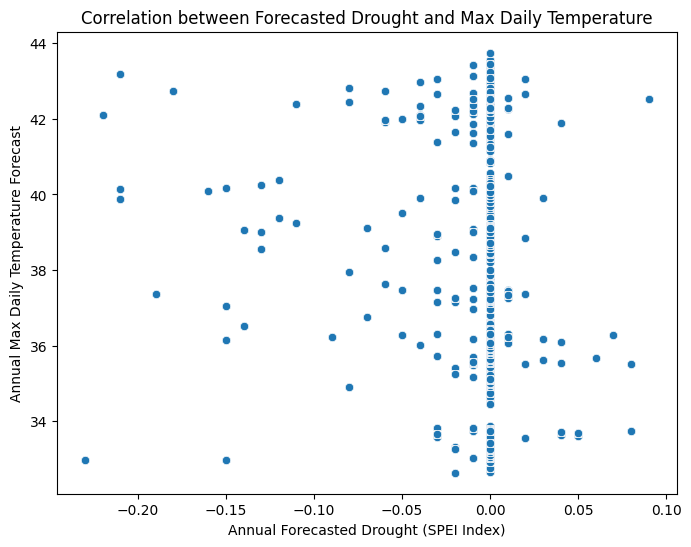

In [25]:
# Is there a correleation between forecasted drought and max daily temperature?
# There is a weak correleation between forecasted drought and maximum daily temperature.

# Scatter plot for correlation between forecasted drought and max daily temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(data=forecast_df, x='AnnualForecastedDrought(SPEI Index)', y='Annualmaxdailytempforecast')
plt.xlabel('Annual Forecasted Drought (SPEI Index)')
plt.ylabel('Annual Max Daily Temperature Forecast')
plt.title('Correlation between Forecasted Drought and Max Daily Temperature')
plt.show()


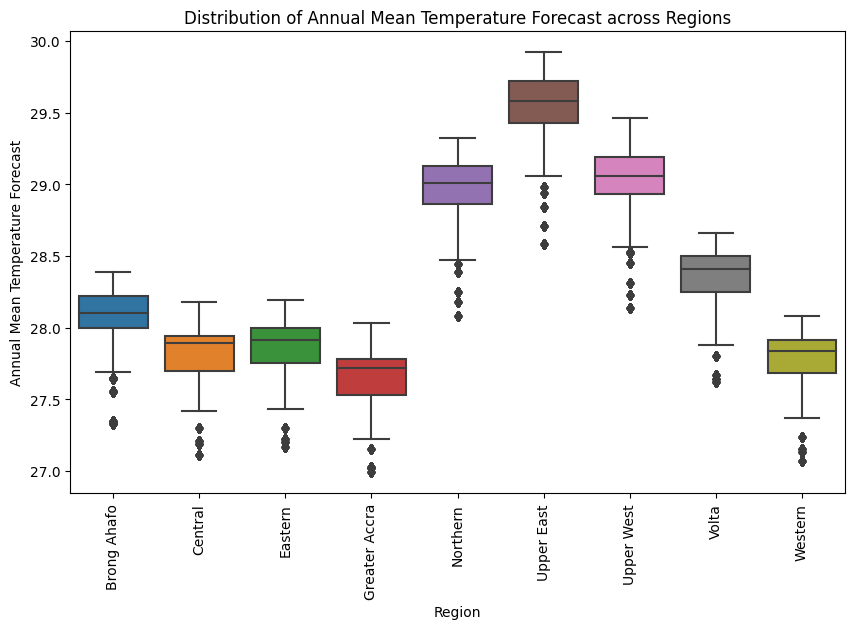

In [26]:
# How does annual mean temperature forecast varies across regions?
# Northern, Upper East, Upper East, and Upper West are predicted to have a higher average temperature.
# 3. Box plot for distribution of annual mean temperature forecast across regions
plt.figure(figsize=(10, 6))
sns.boxplot(data=forecast_df, x='Region', y='Annualmeantempforecast')
plt.xlabel('Region')
plt.ylabel('Annual Mean Temperature Forecast')
plt.title('Distribution of Annual Mean Temperature Forecast across Regions')
plt.xticks(rotation=90)
plt.show()

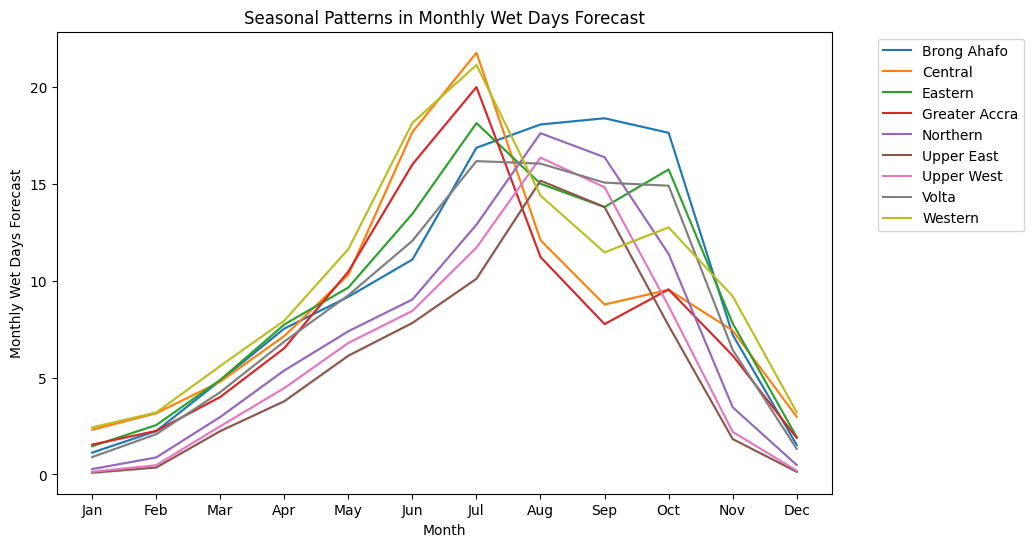

In [27]:
# How does seasonal pattern for wet days vary across region?
# All Ghana regions can expect wet days to decrease.
#  Line chart for seasonal patterns in monthly wet days forecast
plt.figure(figsize=(10, 6))
sns.lineplot(data=forecast_df, x='Month_x', y='MonthlyWetDaysForecast', hue='Region')
plt.xlabel('Month')
plt.ylabel('Monthly Wet Days Forecast')
plt.title('Seasonal Patterns in Monthly Wet Days Forecast')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


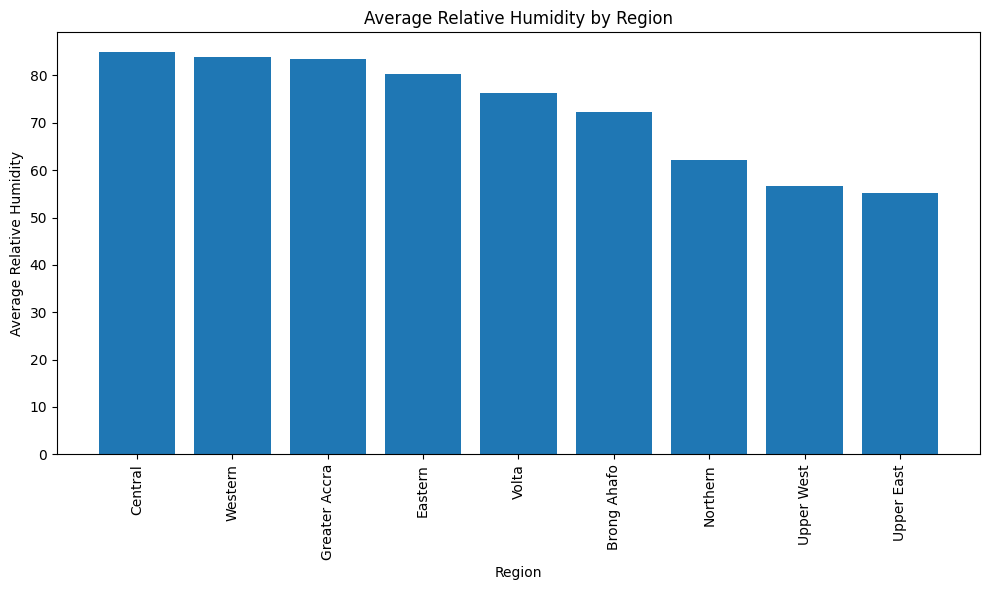

In [56]:
# Which region exhibits the highest average relative humidity over the years? Central Region
# Group the data by region and calculate the mean relative humidity
mean_rh_by_region = forecast_df.groupby('Region')['AnnualRelativeHumidityForecast'].mean()

# Sort the regions based on the mean relative humidity in descending order
sorted_regions = mean_rh_by_region.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_regions.index, sorted_regions)
plt.xlabel('Region')
plt.ylabel('Average Relative Humidity')
plt.title('Average Relative Humidity by Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


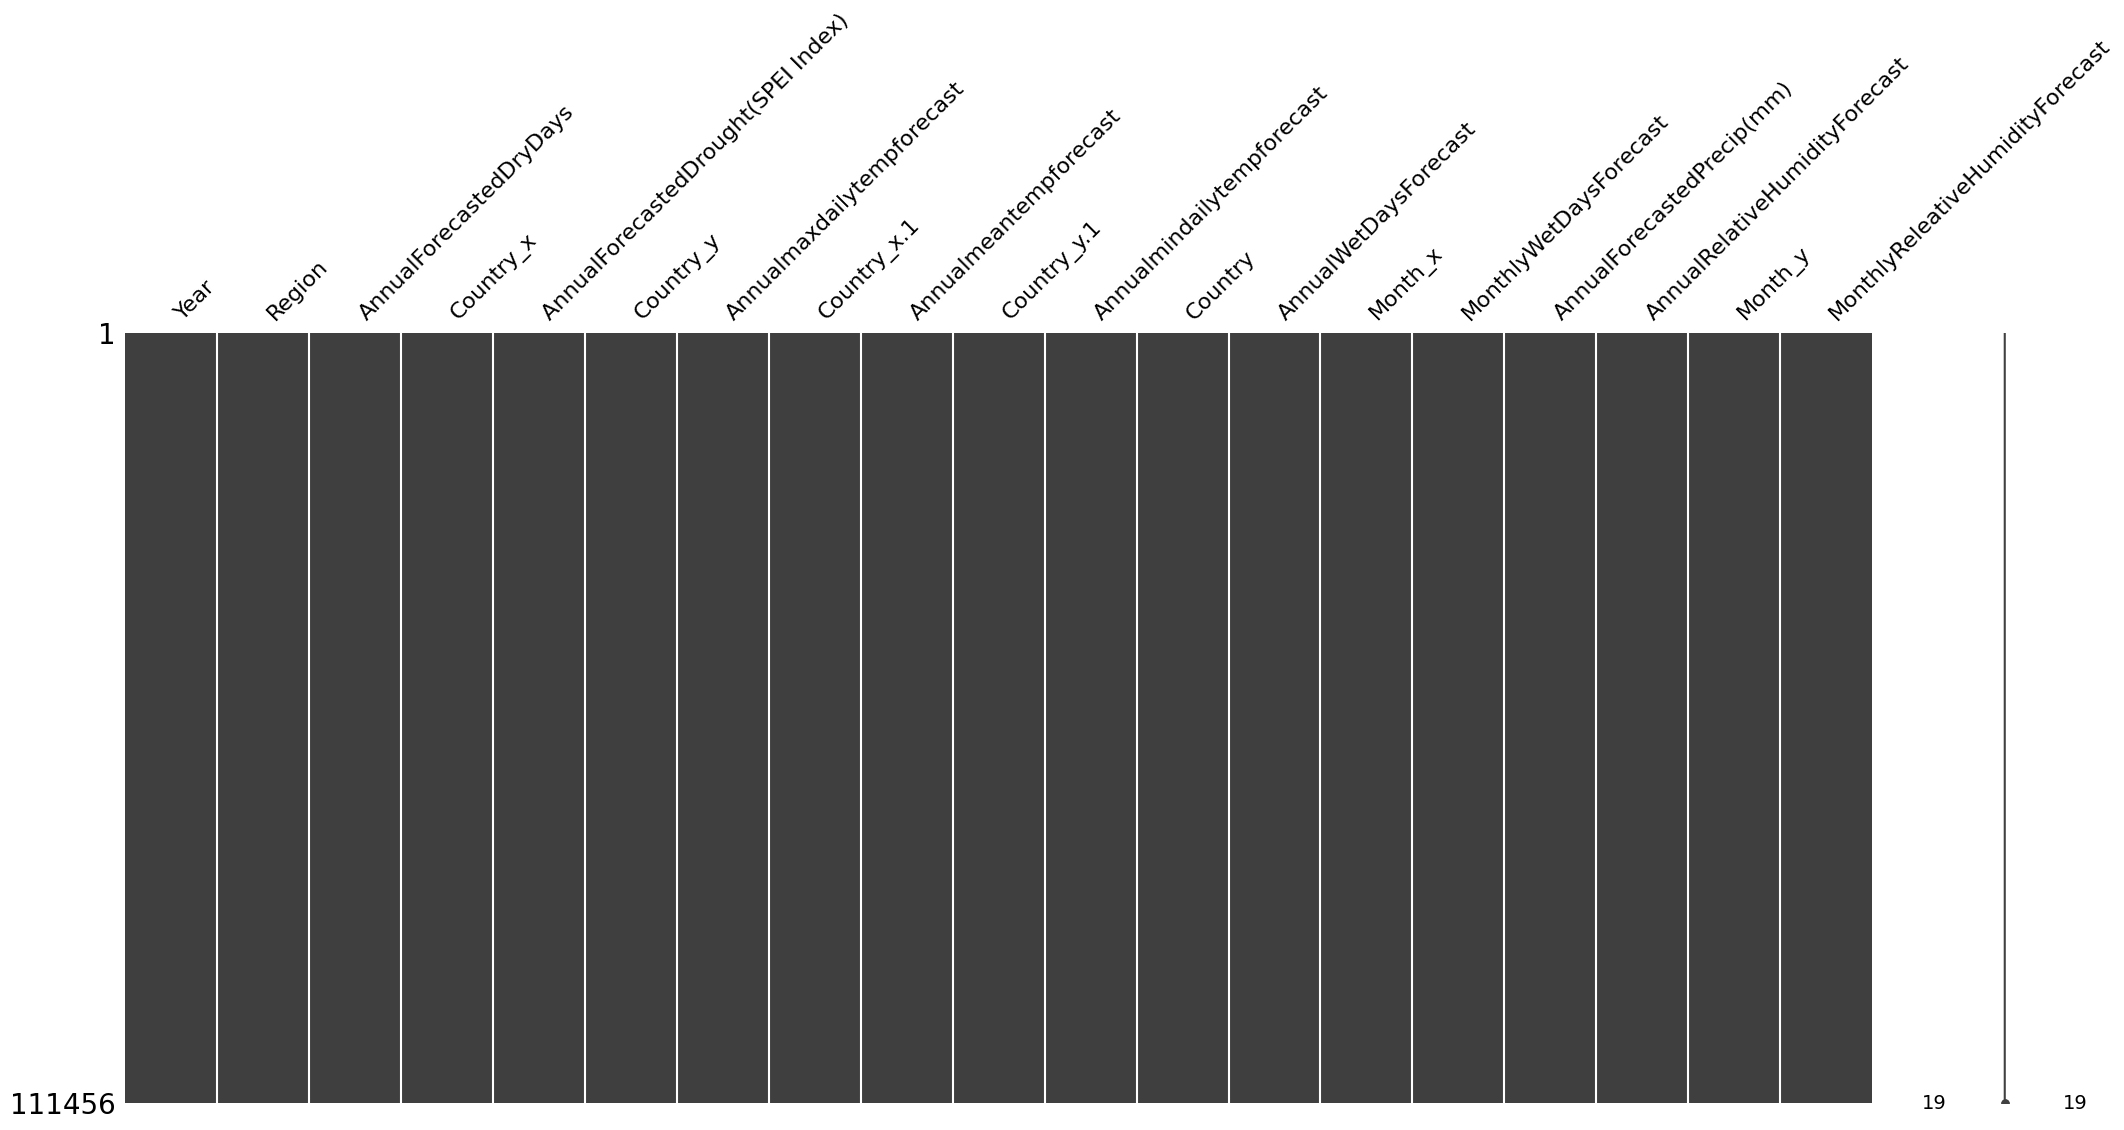

In [59]:
# Analyzing missing values data
# No missing values
msno.matrix(forecast_df)
plt.show()
